In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline

Using CNTK backend


In [2]:
np.random.seed(42)

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
# Преобразование размерности изображений
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Нормализация данных
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [6]:
model = Sequential()
#model.add(Dense(800, input_dim = 784, activation = "relu"))
#model.add(Dense(10, activation = "softmax"))
model.add(Conv2D(75, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(100, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss = "categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 75)        1950      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 75)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 100)         187600    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 100)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 100)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
__________

In [7]:
early_stopping_callback = EarlyStopping(monitor='val_acc', patience=2)

In [8]:
history = model.fit(x_train, y_train, batch_size = 256, epochs = 50, verbose = 2, validation_split = 0.1, callbacks=[early_stopping_callback])

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
 - 77s - loss: 2.0523 - acc: 0.3153 - val_loss: 1.1938 - val_acc: 0.7988
Epoch 2/50
 - 74s - loss: 0.9006 - acc: 0.7169 - val_loss: 0.3646 - val_acc: 0.9098
Epoch 3/50
 - 74s - loss: 0.5264 - acc: 0.8365 - val_loss: 0.2438 - val_acc: 0.9323
Epoch 4/50
 - 74s - loss: 0.4015 - acc: 0.8761 - val_loss: 0.1947 - val_acc: 0.9458
Epoch 5/50
 - 74s - loss: 0.3361 - acc: 0.8968 - val_loss: 0.1634 - val_acc: 0.9523
Epoch 6/50
 - 74s - loss: 0.2918 - acc: 0.9107 - val_loss: 0.1424 - val_acc: 0.9615
Epoch 7/50
 - 75s - loss: 0.2632 - acc: 0.9196 - val_loss: 0.1287 - val_acc: 0.9638
Epoch 8/50
 - 75s - loss: 0.2387 - acc: 0.9276 - val_loss: 0.1184 - val_acc: 0.9667
Epoch 9/50
 - 75s - loss: 0.2218 - acc: 0.9323 - val_loss: 0.1108 - val_acc: 0.9700
Epoch 10/50
 - 74s - loss: 0.2081 - acc: 0.9371 - val_loss: 0.1014 - val_acc: 0.9717
Epoch 11/50
 - 75s - loss: 0.1926 - acc: 0.9412 - val_loss: 0.0962 - val_acc: 0.9728
Epoch 12/50
 - 75s - loss

Обучение остановлено на 28 эпохе
Точность -  0.982


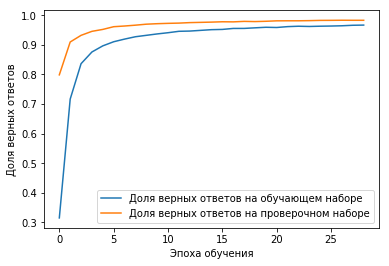

In [9]:
if (early_stopping_callback.stopped_epoch != 0):
    print("Обучение остановлено на", early_stopping_callback.stopped_epoch,"эпохе")
print("Точность - ", model.evaluate(x_test, y_test, verbose = 0)[1])

plt.plot(history.history['acc'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [10]:
# Сохраняем модель
model_json = model.to_json()
json_file = open("mnist_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("mnist_model.h5")